In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import kagglehub

path = "titanic3.xls"

## Task 1: Data Loading and Initial Exploration
Lecture material: Lecture 3, slides 4–8, 10, and 11.
- Load the dataset into a Pandas DataFrame.
- Perform basic exploratory data analysis (EDA) to comprehend the structure and characteristics of the data.
Note: Your analysis should include appropriate exploratory statistics and visualizations

mirar mapa, introduction

In [11]:
df = pd.read_excel(path)
print(df.head())
print(df.describe())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

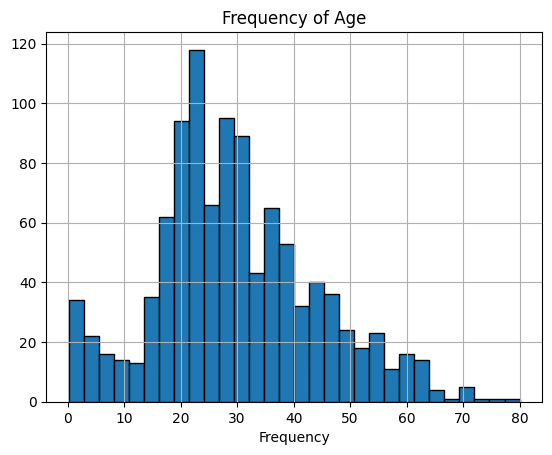

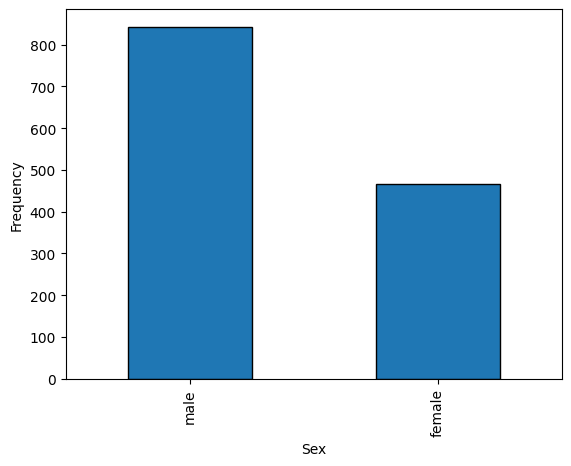

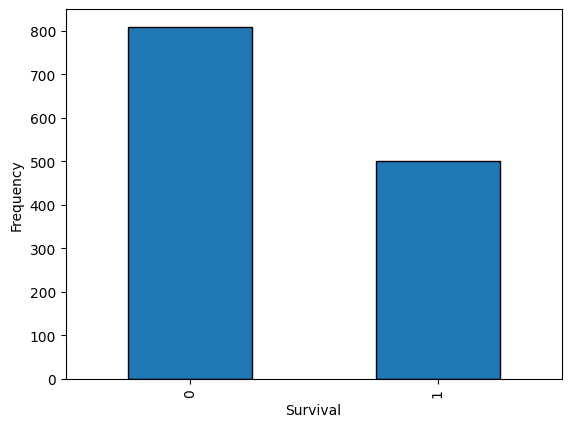

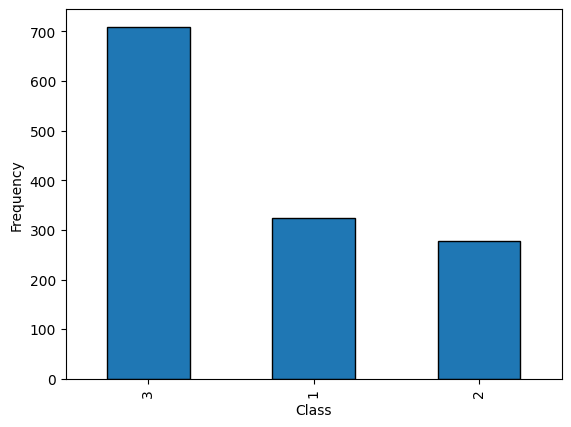

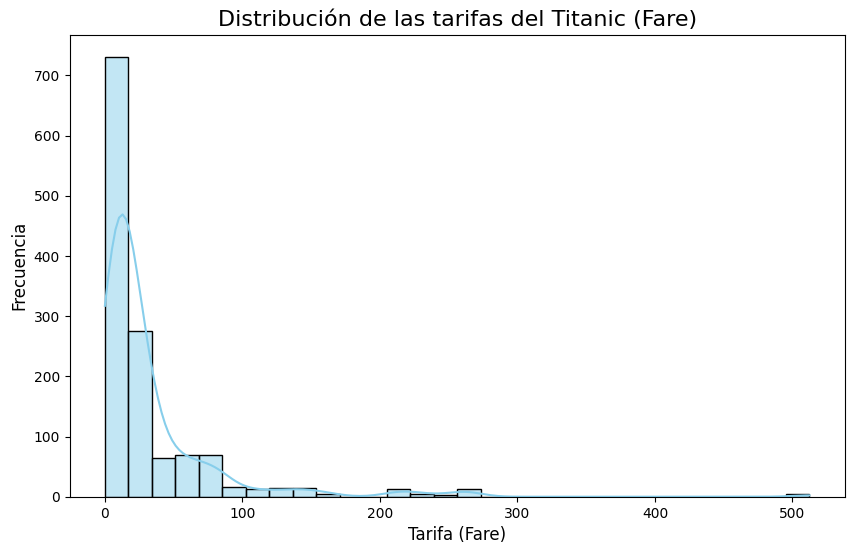

In [23]:
# Plot 1: Age frequency
df['age'].hist(bins=30, edgecolor = 'black')
plt.xlabel("Age")
plt.xlabel("Frequency")
plt.title("Frequency of Age")
plt.show()

# Plot 2: Sex
df['sex'].value_counts().plot(kind='bar', edgecolor = 'black')
plt.title('')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

# Plot 3: Survival
df['survived'].value_counts().plot(kind='bar', edgecolor = 'black')
plt.title('')
plt.xlabel('Survival')
plt.ylabel('Frequency')
plt.show()

# Plot 4: Class
df['pclass'].value_counts().plot(kind='bar', edgecolor = 'black')
plt.title('')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Plot 5: Port of embarkation



# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['fare'], bins=30, kde=True, color='skyblue')

# Agregar etiquetas
plt.title('Distribución de las tarifas del Titanic (Fare)', fontsize=16)
plt.xlabel('Tarifa (Fare)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.show()


In [25]:
import pandas as pd

# Relación entre Fare y Cabin
fare_cabin_relation = df.groupby('cabin')['fare'].describe()

# Relación entre Fare y Embarked
fare_embarked_relation = df.groupby('embarked')['fare'].describe()

# Mostrar las tablas
print("Relación entre Fare y Cabin:")
print(fare_cabin_relation)

print("\nRelación entre Fare y Embarked:")
print(fare_embarked_relation)


Relación entre Fare y Cabin:
       count     mean       std      min      25%      50%      75%      max
cabin                                                                       
A10      1.0  40.1250       NaN  40.1250  40.1250  40.1250  40.1250  40.1250
A11      1.0  27.7208       NaN  27.7208  27.7208  27.7208  27.7208  27.7208
A14      1.0  52.0000       NaN  52.0000  52.0000  52.0000  52.0000  52.0000
A16      1.0  39.6000       NaN  39.6000  39.6000  39.6000  39.6000  39.6000
A18      1.0  29.7000       NaN  29.7000  29.7000  29.7000  29.7000  29.7000
...      ...      ...       ...      ...      ...      ...      ...      ...
F33      4.0  11.1250  1.250000  10.5000  10.5000  10.5000  11.1250  13.0000
F38      1.0   7.7500       NaN   7.7500   7.7500   7.7500   7.7500   7.7500
F4       4.0  39.0000  0.000000  39.0000  39.0000  39.0000  39.0000  39.0000
G6       5.0  14.2050  3.416419  10.4625  10.4625  16.7000  16.7000  16.7000
T        1.0  35.5000       NaN  35.5000  35.50

Is Data Accessible
Is Data enough? 
Is the data usable?
Are the data tidy (Lecture 1, Slide 14)? If not, we need feature engineering to tidy it up.
○ Are data tidy but incomplete? If yes, we need data imputation methods
○ Are data tidy but with duplicates?
○ Are data tidy but expired or significantly out of date?
○ Are data tidy but incomplete or unrepresentative of the phenomenon?
● Do we know the source of our data?
○ Were gender data manually inputted or were they the result of a low-quality classifier?
● Do we know whether there is data leakage, i.e., the prediction target is
(implicitly) contained in the training dataset
○ Given a spreadsheet with several column containing information about real estates, we want to
train a model that predicts the selling price of each estate. We remove from the spreadsheet the
column about the selling price but we keep the one about the commission of the state agent. The
model learns the correlation between the agent’s commission and the final price, skewing our
evaluation. In deployment, that information is not available and the model fails most of the time.
● Do we know whether data are reliable? Can we trust the labels?
○ We can perform (manual, automated) validation of quality on a subset of the data.
○ Are labels delayed? We observe labels now but use them to predict far future events.
○ Are labels indirect? Indicates a weak correlation with the prediction target (e.g., page interest)
○ Do we have feedback loops? We train the model on the results of that model’s predictions (e.g.,
recommendation system promotes its own prediction to the users that click on it, indirectly
reinforcing that very same prediction in the model). 
Common Data Issues
● Cost, Noise, Bias, Low predictive power, Outdated examples, Outliers, Leakage
● High cost of (labeled) data:
○ Utilize well-designed labeling tools for humans to streamline the labeling process: crowdsourcing
and gamification of the task (e.g., reCAPTCHA, leaderboard, score), reduce decision making to
yes/no questions, noisy pre-labeling.
11

# Task 2: Managing Missing Values
Lecture Material: Lecture 3, slides 22–24.
- Identify the columns containing missing values.
- Develop a strategy to address them.

In [22]:
missing_values = df.isnull().sum()
print(missing_values)

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


## Dealing with age missing values

Most interesting way group by class and sex, survived and find mean. Buscar un plot de boxplots

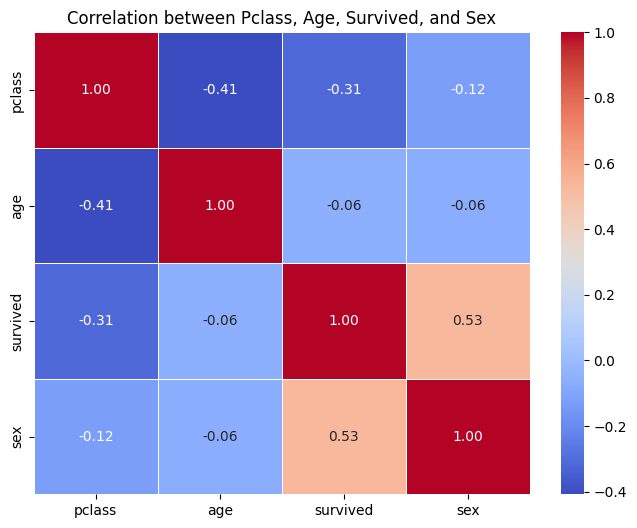

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir 'Sex' en variable numérica (0 para masculino, 1 para femenino)
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# Seleccionar las columnas de interés
columns_of_interest = ['pclass', 'age', 'survived', 'sex']

# Calcular la matriz de correlación
corr_matrix = df[columns_of_interest].corr()

# Crear el mapa de calor (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation between Pclass, Age, Survived, and Sex")
plt.show()


In [ ]:
print(f"Valores faltantes en 'Age': {df['age'].isnull().sum()}")

age_grouped = df.groupby(['pclass', 'sex', 'survived'])['age'].mean().reset_index()

print(age_grouped)

Valores faltantes en 'Age': 263
    pclass     sex  survived        age
0        1  female         0  35.200000
1        1  female         1  37.109375
2        1    male         0  43.658163
3        1    male         1  36.168240
4        2  female         0  34.090909
5        2  female         1  26.711051
6        2    male         0  33.092593
7        2    male         1  17.449274
8        3  female         0  23.418750
9        3  female         1  20.814815
10       3    male         0  26.679598
11       3    male         1  22.436441


## Dealing with fare missing values

find someone who was in the same class, embarked on the same port, on the same cabin. ALso check if he had parents/children who were there and check if they all payed the same and if went through the same class and characteristics. 

DO the mean?
Delete entry?

In [ ]:
import pandas as pd

# familiar 

def get_similar_fares(df, passenger_index):
    """
    Esta función recibe un DataFrame (df) y el índice de un pasajero con valor faltante en 'Fare'.
    Busca a otras personas con las mismas características y devuelve las tarifas de esas personas.
    
    Argumentos:
    df -- DataFrame con los datos del Titanic.
    passenger_index -- índice del pasajero con valor faltante en 'Fare'.
    
    Retorna:
    Una lista con las tarifas (fare) de las personas con las mismas características.
    """
    # Obtener el pasajero con el valor faltante
    passenger = df.loc[passenger_index]
    
    # Filtrar a las personas con las mismas características
    similar_passengers = df[
        (df['pclass'] == passenger['pclass']) & 
        (df['embarked'] == passenger['embarked']) & 
        (df['sibsp'] == passenger['sibsp']) &  # Para verificar el número de familiares en el mismo viaje
        (df['parch'] == passenger['parch'])   # Verificar si tienen los mismos padres/hijos
    ]
    
    # Excluir al pasajero con el valor faltante en 'Fare' para no incluirlo en la comparación
    similar_passengers = similar_passengers[similar_passengers['fare'].notnull()]
    
    # Si encontramos pasajeros similares, devolver sus tarifas (Fare)
    return similar_passengers['fare'].tolist()

# Ejemplo de uso
# Buscar los pasajeros similares para el primer pasajero con valor faltante en Fare
missing_fare_index = df[df['fare'].isnull()].index[0]  # Índice del primer pasajero con fare faltante
similar_fares = get_similar_fares(df, missing_fare_index)

print(f"Las tarifas similares para este pasajero son: {similar_fares}")


Las tarifas similares para este pasajero son: []


In [41]:
import pandas as pd

# familiar 

def get_similar_fares(df, passenger_index):
    """
    Esta función recibe un DataFrame (df) y el índice de un pasajero con valor faltante en 'Fare'.
    Busca a otras personas con las mismas características y devuelve las tarifas de esas personas.
    
    Argumentos:
    df -- DataFrame con los datos del Titanic.
    passenger_index -- índice del pasajero con valor faltante en 'Fare'.
    
    Retorna:
    Una lista con las tarifas (fare) de las personas con las mismas características.
    """
    # Obtener el pasajero con el valor faltante
    passenger = df.loc[passenger_index]
    
    # Filtrar a las personas con las mismas características
    similar_passengers = df[
        (df['pclass'] == passenger['pclass']) & 
        (df['embarked'] == passenger['embarked'])  # Verificar si tienen los mismos padres/hijos
    ]
    
    # Excluir al pasajero con el valor faltante en 'Fare' para no incluirlo en la comparación
    similar_passengers = similar_passengers[similar_passengers['fare'].notnull()]
    
    # Si encontramos pasajeros similares, devolver sus tarifas (Fare)
    return similar_passengers['fare'].tolist()

# Ejemplo de uso
# Buscar los pasajeros similares para el primer pasajero con valor faltante en Fare
missing_fare_index = df[df['fare'].isnull()].index[0]  # Índice del primer pasajero con fare faltante
similar_fares = get_similar_fares(df, missing_fare_index)

print(f"Las tarifas similares para este pasajero son: {similar_fares}")

Las tarifas similares para este pasajero son: [7.55, 20.25, 20.25, 20.25, 7.65, 7.65, 7.925, 7.25, 8.05, 9.475, 9.35, 9.35, 7.8875, 7.925, 7.05, 7.05, 8.05, 8.3, 22.525, 7.8542, 31.275, 31.275, 31.275, 7.925, 7.775, 31.275, 31.275, 31.275, 7.7958, 7.775, 31.275, 7.8542, 7.8958, 17.8, 17.8, 7.775, 7.05, 31.3875, 31.3875, 31.3875, 31.3875, 31.3875, 31.3875, 7.7958, 31.3875, 7.05, 7.8542, 15.85, 15.85, 8.05, 7.8958, 8.05, 8.05, 7.775, 9.35, 56.4958, 7.775, 7.75, 7.8958, 16.1, 7.8542, 7.0458, 7.25, 7.7958, 8.05, 8.6625, 8.6625, 8.6625, 8.6625, 8.6625, 8.6625, 8.05, 7.7958, 7.8542, 7.25, 8.05, 56.4958, 8.05, 7.05, 8.05, 7.4958, 7.4958, 8.05, 7.8958, 7.8958, 7.8958, 8.05, 15.9, 15.9, 15.9, 7.25, 8.1583, 16.1, 16.1, 8.6625, 8.05, 10.5167, 10.1708, 14.4, 14.4, 14.4, 7.8958, 7.8958, 24.15, 8.05, 24.15, 8.05, 16.1, 16.1, 17.4, 17.4, 9.5, 9.5, 20.575, 20.575, 20.575, 20.575, 7.8958, 7.8958, 7.8958, 7.25, 7.25, 7.8958, 8.6625, 7.8958, 8.05, 12.475, 8.05, 7.55, 13.9, 13.9, 7.775, 7.775, 6.975, 7.25

In [40]:
# Obtener la información del pasajero con un valor faltante en 'Fare'
passenger_info = df.loc[missing_fare_index]

# Imprimir la información completa del pasajero
print("Información del pasajero con 'Fare' faltante:")
print(passenger_info)


Información del pasajero con 'Fare' faltante:
pclass                        3
survived                      0
name         Storey, Mr. Thomas
sex                           0
age                        60.5
sibsp                         0
parch                         0
ticket                     3701
fare                        NaN
cabin                       NaN
embarked                      S
boat                        NaN
body                      261.0
home.dest                   NaN
Name: 1225, dtype: object


## Dealing with cabin missing values

In [ ]:
So many missing values, drop column o ar unknown , at the momeent unknown, later discussed if its really miningful to have this variable

In [ ]:
df['Cabin'].fillna('Unknown', inplace=True)

## Dealing with embarked missing values

Delete or put the most repated

In [44]:
# Filtrar las filas donde 'Embarked' es NaN (missing value)
missing_embarked = df[df['embarked'].isnull()]

# Mostrar la información de estos pasajeros
print(missing_embarked)


     pclass  survived                                       name  sex   age  \
168       1         1                        Icard, Miss. Amelie    1  38.0   
284       1         1  Stone, Mrs. George Nelson (Martha Evelyn)    1  62.0   

     sibsp  parch  ticket  fare cabin embarked boat  body       home.dest  
168      0      0  113572  80.0   B28      NaN    6   NaN             NaN  
284      0      0  113572  80.0   B28      NaN    6   NaN  Cincinatti, OH  


        fare  pclass embarked
6    77.9583       1        S
12   69.3000       1        C
13   78.8500       1        S
18   76.2917       1        C
19   75.2417       1        C
..       ...     ...      ...
304  75.2500       1        C
306  77.2875       1        S
307  77.2875       1        S
316  61.3792       1        C
317  61.3792       1        C

[77 rows x 3 columns]


C:\Users\Cate\AppData\Local\Temp\ipykernel_25148\41392218.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='embarked', data=filtered_passengers, palette='Set2')


Text(0, 0.5, 'Número de Pasajeros')

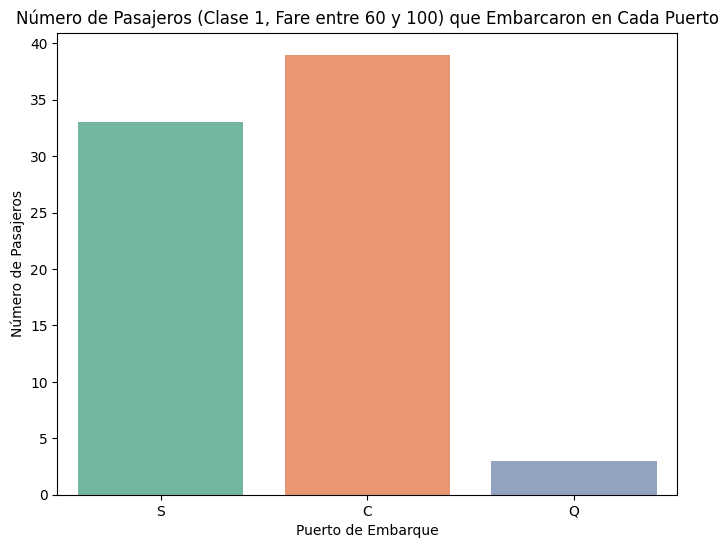

In [51]:
# Filtrar los pasajeros de clase 1 (Pclass 1) que pagaron 80.0 en la tarifa (Fare)
filtered_passengers = df[(df['pclass'] == 1) & (df['fare'] > 60.0) & (df['fare'] < 100.0)]
# Mostrar la información de los pasajeros filtrados, incluyendo el puerto de embarque (Embarked)
print(filtered_passengers[[ 'fare', 'pclass', 'embarked']])

plt.figure(figsize=(8, 6))
sns.countplot(x='embarked', data=filtered_passengers, palette='Set2')

# Añadir título y etiquetas
plt.title('Número de Pasajeros (Clase 1, Fare entre 60 y 100) que Embarcaron en Cada Puerto')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Número de Pasajeros')

C:\Users\Cate\AppData\Local\Temp\ipykernel_25148\2802683368.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='embarked', data=df, palette='Set2')


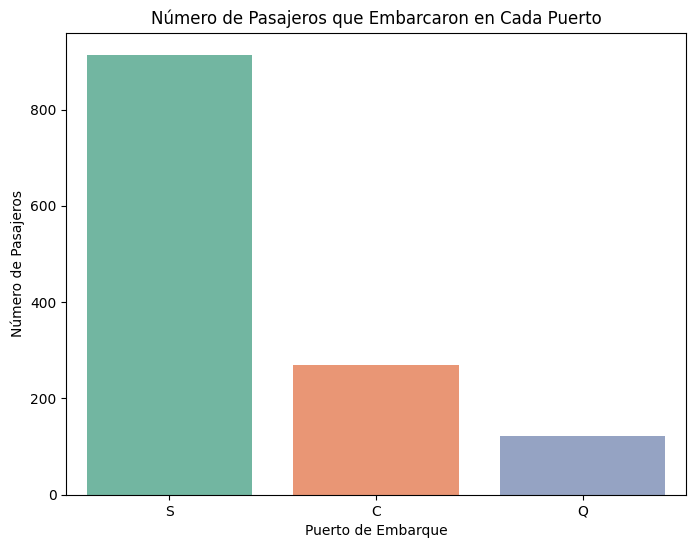

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de barras para ver cuántas personas se embarcaron en cada puerto
plt.figure(figsize=(8, 6))
sns.countplot(x='embarked', data=df, palette='Set2')

# Añadir título y etiquetas
plt.title('Número de Pasajeros que Embarcaron en Cada Puerto')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Número de Pasajeros')

# Mostrar el gráfico
plt.show()


## Other Missing values

boat, body, home dest(si hay familiar llendo al mismo sitio ponerle la misma destination)

# Task 3: Encoding Categorical Variables
Lecture material: Lecture 4, slides 10–15, 21.
- Identify the categorical variables in the dataset.
- Utilize OneHotEncoder to encode them.
- Observe the transformation and discuss its impact on machine learning models

Categorical: male/female, class, embarked, survived 0/1, cabin,,,,, ticket? boat?


que pasa con nombre y direcciones ?

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Crear una columna 'Cabin_grouped' con la primera letra de la cabina
df['Cabin_grouped'] = df['Cabin'].str[0]

encoder = OneHotEncoder(drop='first', sparse=False)

categorical_columns = ['Sex', 'Pclass', 'Embarked', 'Survived', 'Cabin_grouped']

encoded_columns = encoder.fit_transform(df[categorical_columns])

encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

# Unir el DataFrame original con el DataFrame codificado
df_encoded = pd.concat([df, encoded_df], axis=1)

# Eliminar las columnas originales
df_encoded.drop(categorical_columns, axis=1, inplace=True)

# Mostrar las primeras filas del DataFrame codificado
print(df_encoded.head())


cabin
C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
D                  4
F4                 4
F33                4
C78                4
F2                 4
C22 C26            4
B96 B98            4
Name: count, dtype: int64


C:\Users\Cate\AppData\Local\Temp\ipykernel_25148\752669577.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cabin_counts.index, y=cabin_counts.values, palette='Set2')


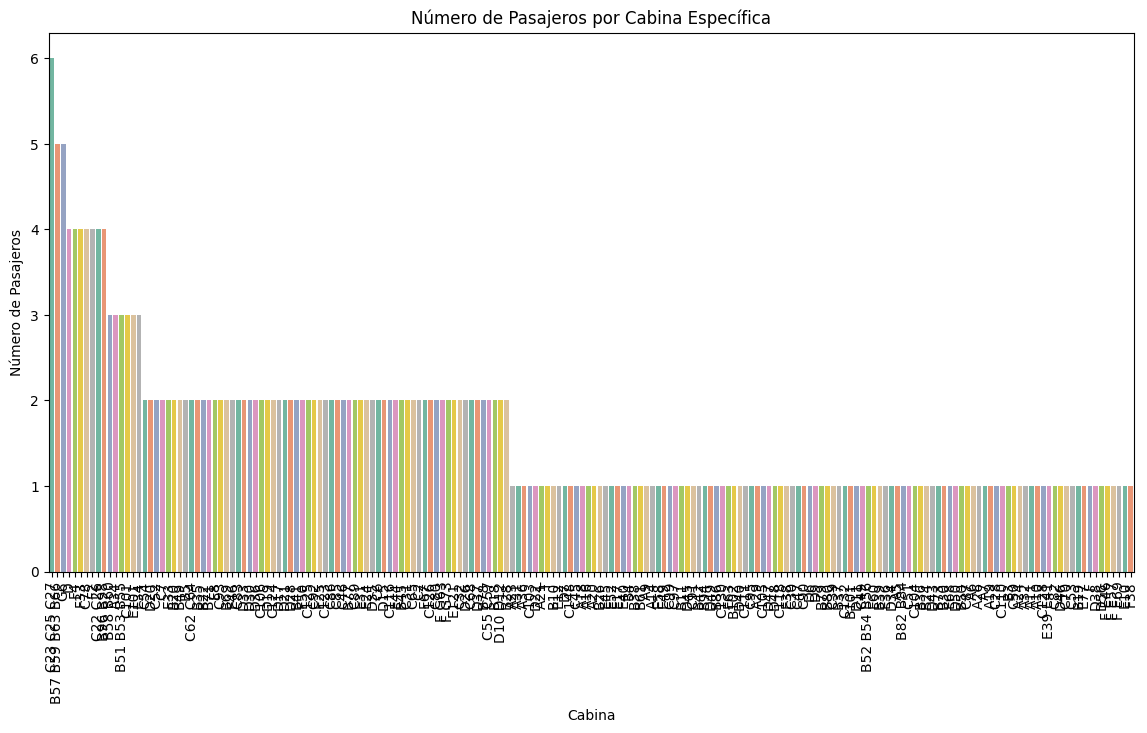

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar cuántas personas había en cada cabina específica (sin agrupar por la letra inicial)
cabin_counts = df['cabin'].value_counts()

# Mostrar los primeros 10 valores para verificar
print(cabin_counts.head(10))

# Crear un gráfico de barras para mostrar la cantidad de pasajeros en cada cabina específica
plt.figure(figsize=(14, 7))
sns.barplot(x=cabin_counts.index, y=cabin_counts.values, palette='Set2')

# Añadir título y etiquetas
plt.title('Número de Pasajeros por Cabina Específica')
plt.xlabel('Cabina')
plt.ylabel('Número de Pasajeros')
plt.xticks(rotation=90)  # Rotar las etiquetas para que sean legibles

# Mostrar el gráfico
plt.show()


# Task 4: Feature Scaling
Lecture material: Lecture 5, slides 14–20.
- Standardize the numerical variables using StandardScaler.
- Normalize the numerical variables using MinMaxScaler.
- Discuss the differences between standardization and normalization, along with their importance

In [ ]:
print(df.dtypes)
numerical_columns = ['age', 'sibsp', 'parch', 'fare', 'body']

pclass             int64
survived           int64
name              object
sex                int64
age              float64
sibsp              int64
parch              int64
ticket            object
fare             float64
cabin             object
embarked          object
boat              object
body             float64
home.dest         object
Cabin_grouped     object
dtype: object


In [ ]:
scaler = sklearn.preprocessing.StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print(df[numerical_columns].head())

In [ ]:
scaler_minmax = sklearn.preprocessing.MinMaxScaler()
df[numerical_columns] = scaler_minmax.fit_transform(df[numerical_columns])

print(df[numerical_columns].head())

# Task 5: Data Splitting
Lecture material: Lecture 2, slides 4–7.
- Split the dataset into training, validation, and test sets.
- Ensure that the split reflects the original distribution of the target variable using stratification.
Note: a good strategy is to first split the dataset into ‘training’ and ‘others’, and then split ‘others’ into equally
sized ‘validation’ and ‘test’ sets. When splitting sets, consider the argument stratify of the train test split
method.